# Tree Models

Alike to SVM, these can be used for both classification and regression but we will just discuss them in teh context of classification.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
from IPython.display import Image

#!pip install gitpython
#!pip install graphviz
#!pip install imblearn

matplotlib.rcParams['animation.embed_limit'] = 30000000.0
plt.rcParams['figure.dpi'] = 120

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

If you get: "ImportError: Bad git executable." make sure to install git

In [2]:
import git
import os
if os.path.exists(os.path.join(os.getcwd(),"palmerpenguins")):
    print("Already Cloned")
else:
    git.Git(os.getcwd()).clone("https://github.com/allisonhorst/palmerpenguins.git")
    
image_path = os.path.join(os.getcwd(),"palmerpenguins", "man", "figures")

Already Cloned


In [3]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()

# Introduction

__TODO__
- Match the colours in the plot to the colours of the images below

___
Artwork by @allison_horst

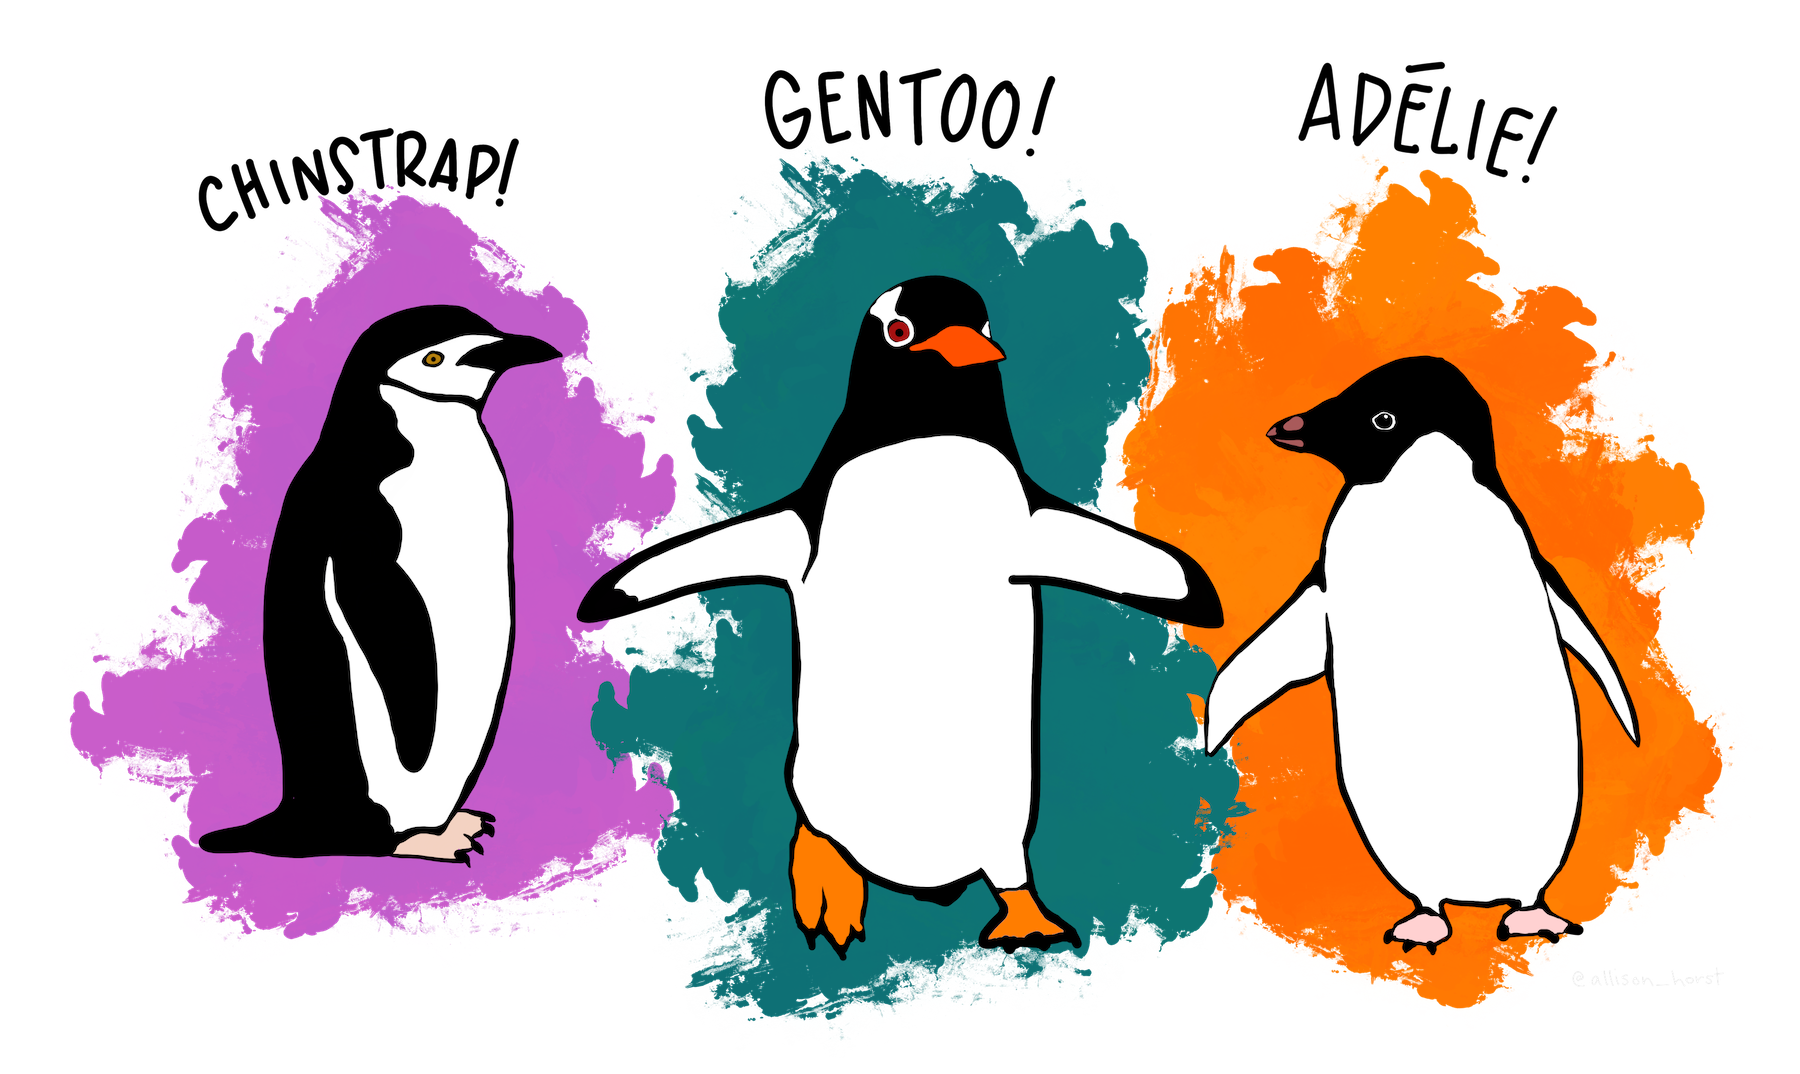

In [4]:
Image(os.path.join(image_path, "lter_penguins.png"))

__[INFORMATION]__

In [5]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

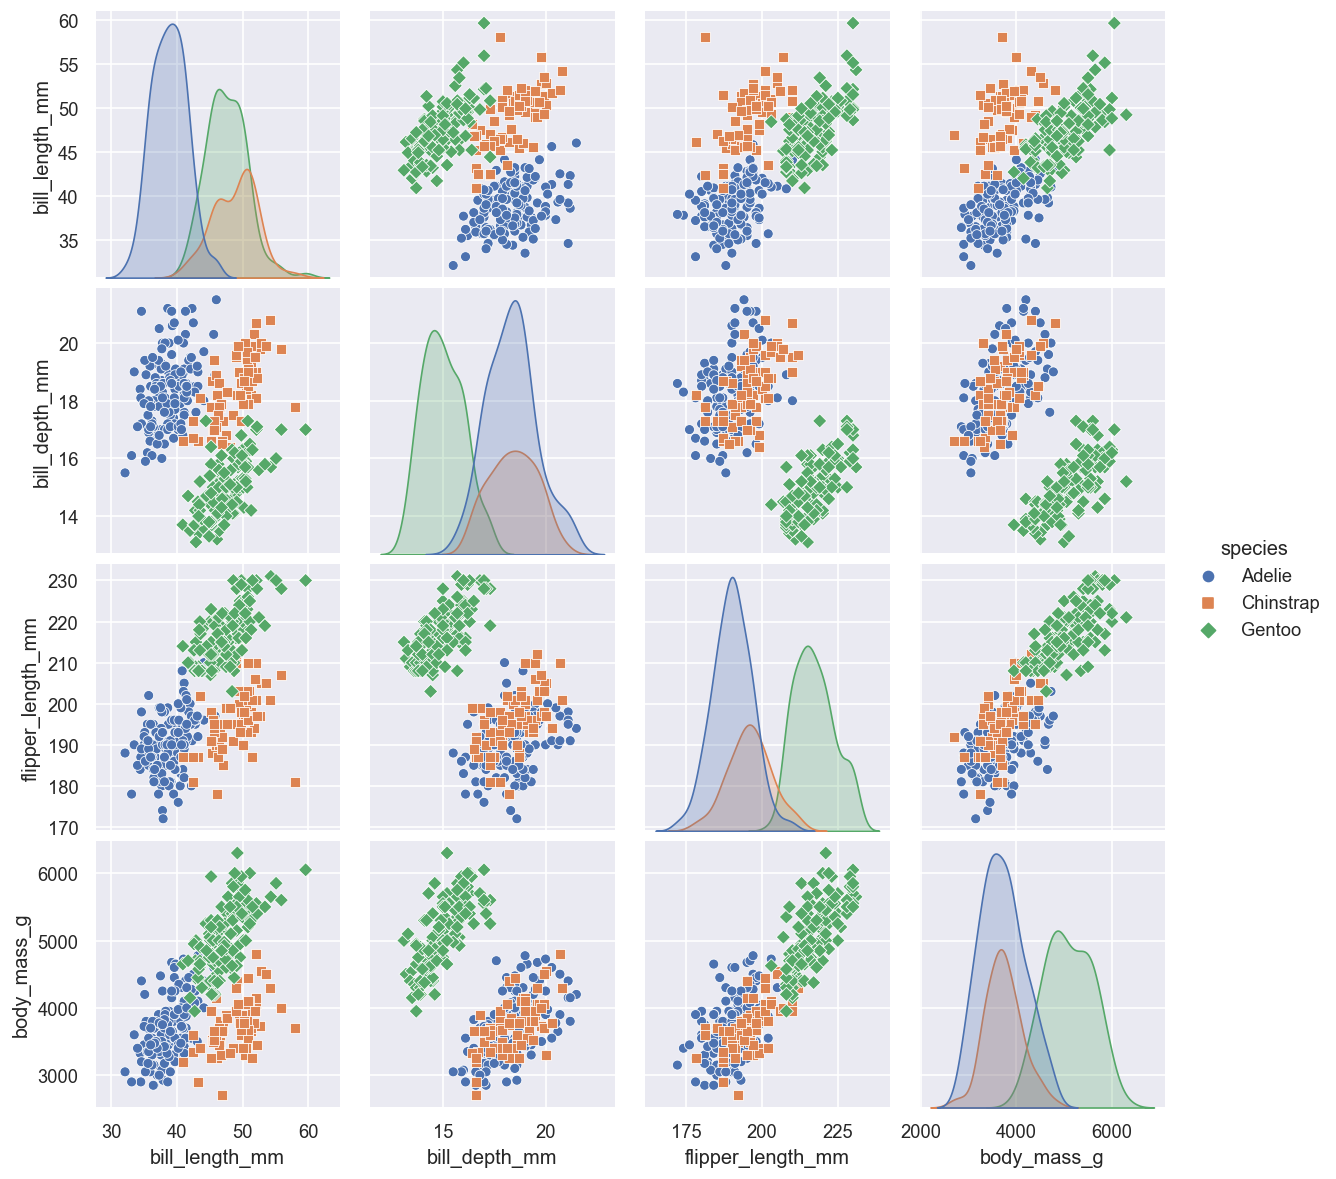

In [6]:
sns.pairplot(penguins, hue="species", markers=["o", "s", "D"])
plt.show()

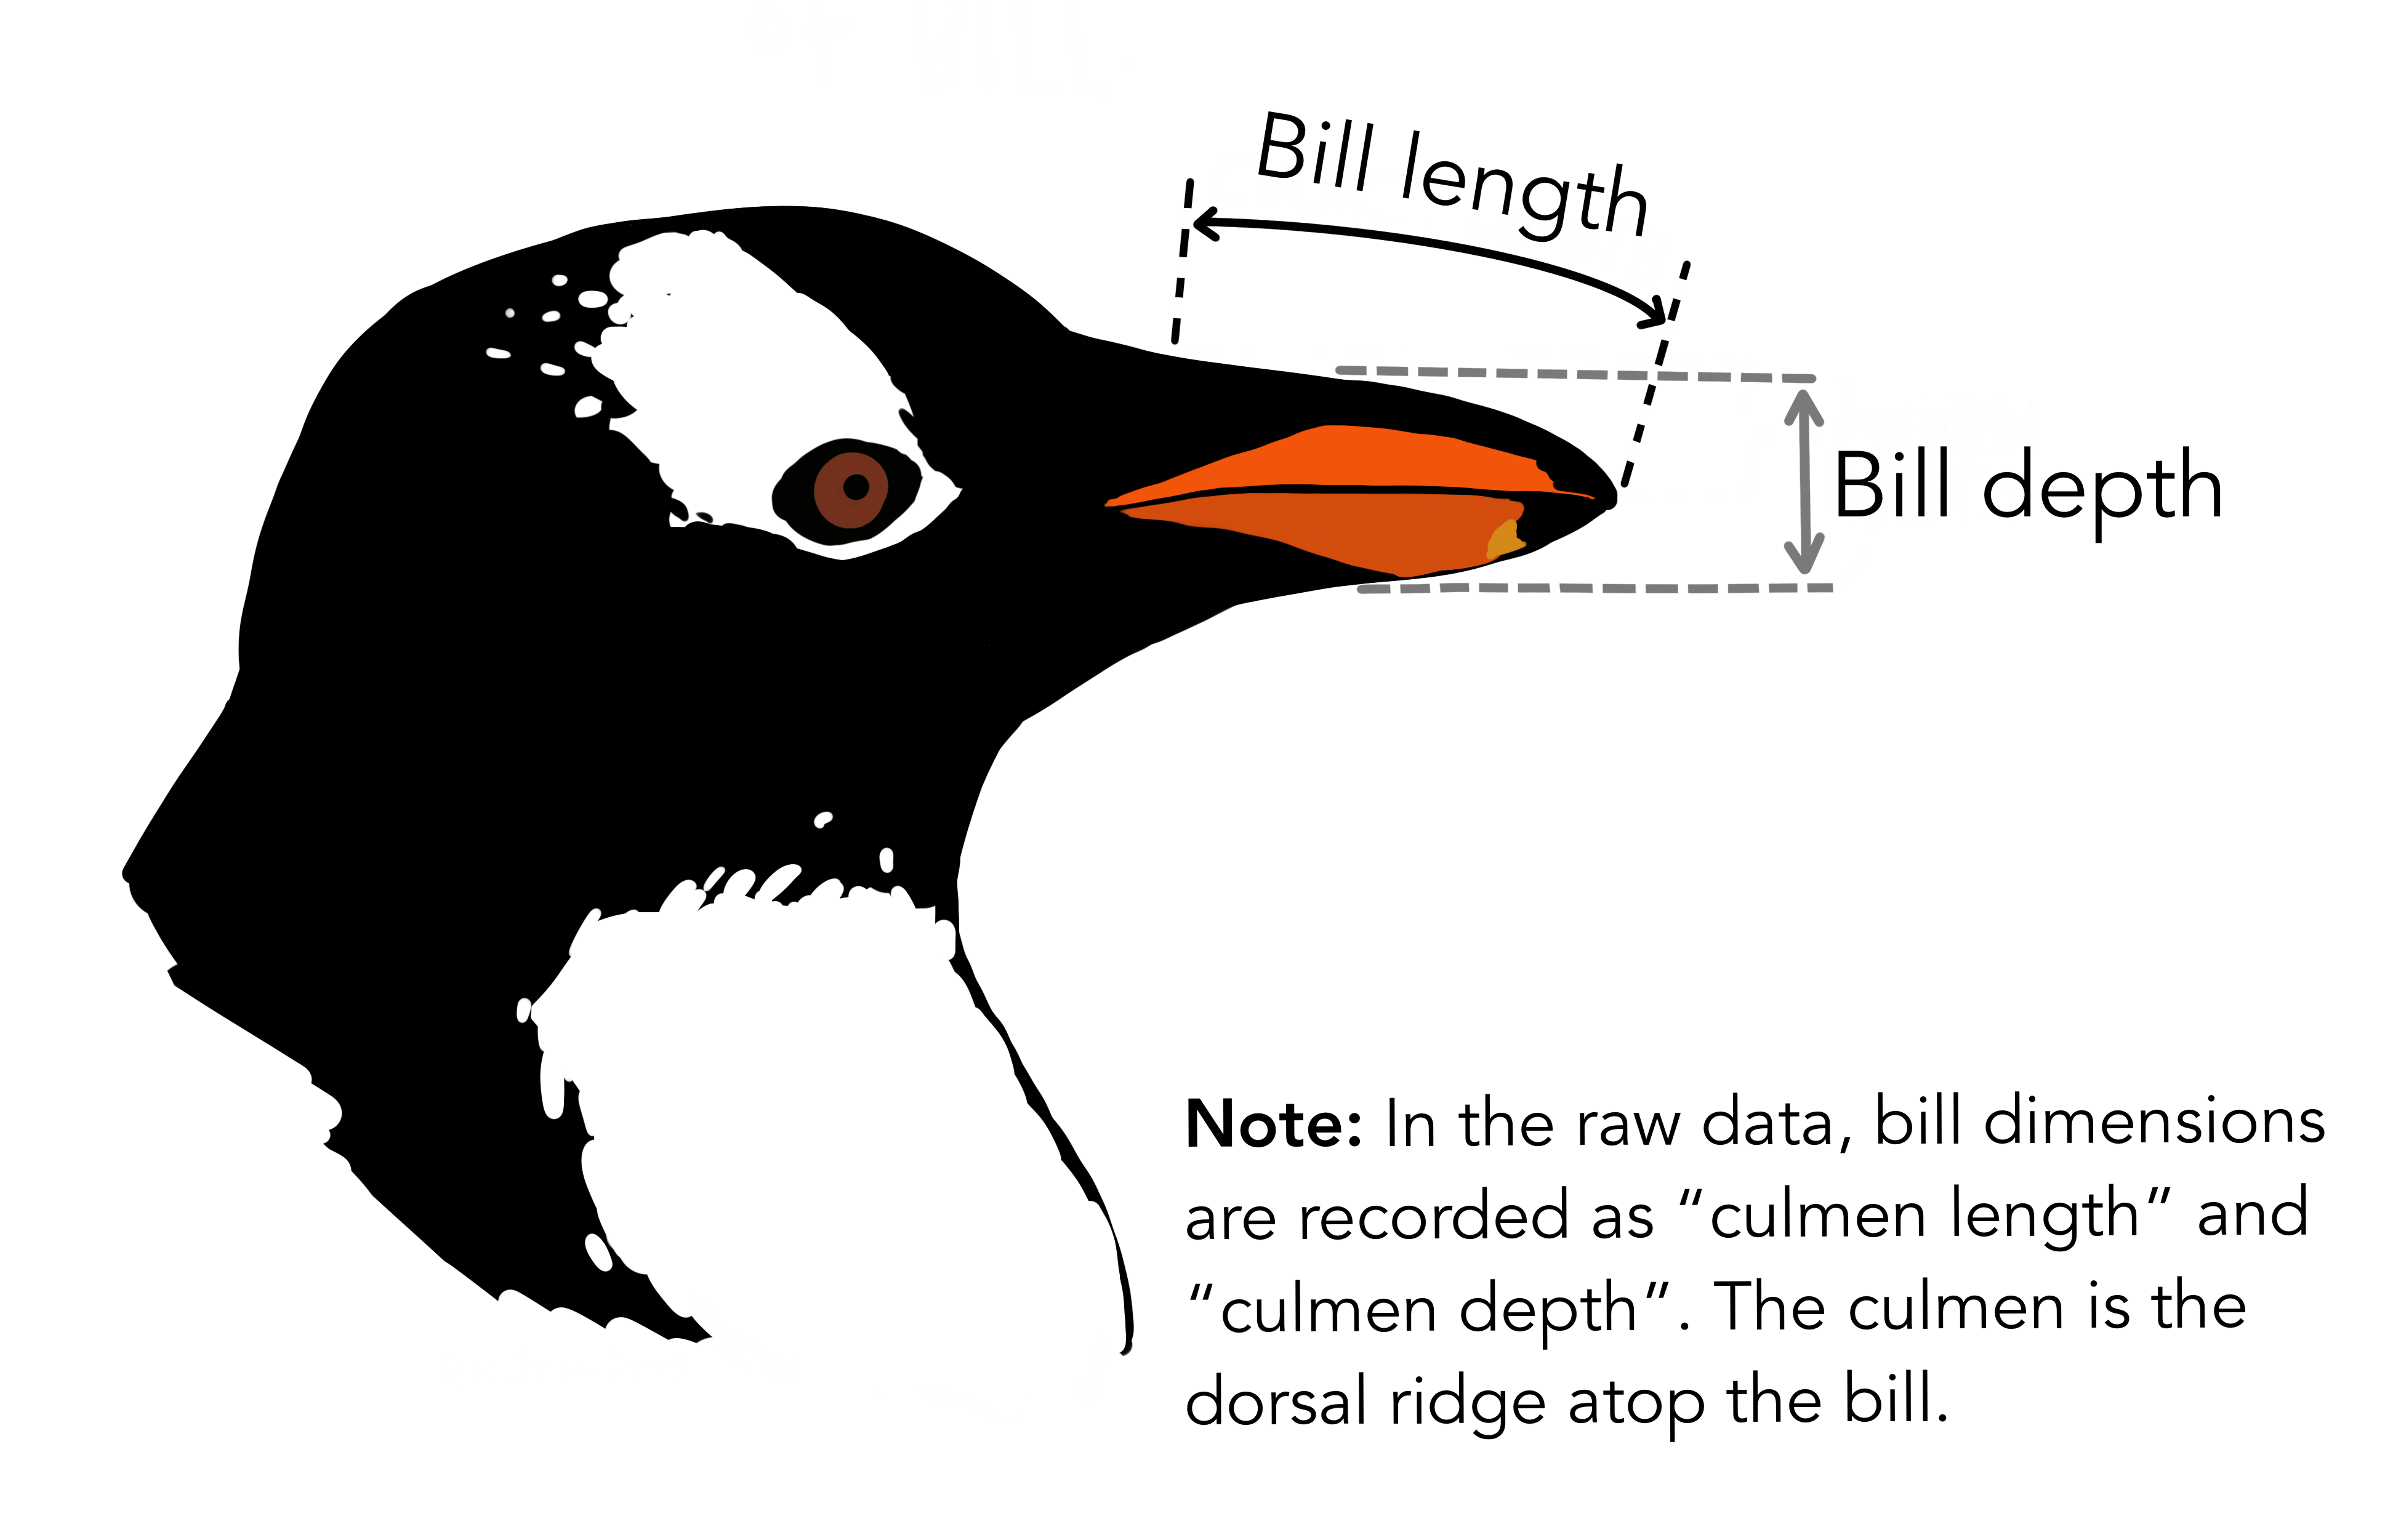

In [7]:
Image(os.path.join(image_path, "culmen_depth.png"))

In [8]:
penguins_bin = penguins[penguins.species != "Chinstrap"]
y = penguins_bin[["species"]].replace({'Adelie': 0, 'Gentoo': 1}).values.flatten()

flbl = penguins_bin[["flipper_length_mm", "bill_length_mm", "species"]]
Xflbl = flbl[["flipper_length_mm", "bill_length_mm"]].values

blbd = penguins_bin[["bill_length_mm", "bill_depth_mm", "species"]]
Xblbd = blbd[["bill_length_mm", "bill_depth_mm"]].values

def bill_flipper_plots():
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    plt.sca(axes[0])
    g = sns.scatterplot(data=flbl, x = "flipper_length_mm", 
                y = "bill_length_mm", hue="species", 
                style = "species")
    #plt.title("")
    g.axes.get_legend().set_title(False)
    
    
    plt.sca(axes[1])
    g = sns.scatterplot(data=blbd, x = "bill_length_mm", 
                y = "bill_depth_mm", hue="species", 
                style = "species")
    #plt.title("")
    g.axes.get_legend().set_title(False)
    plt.show()

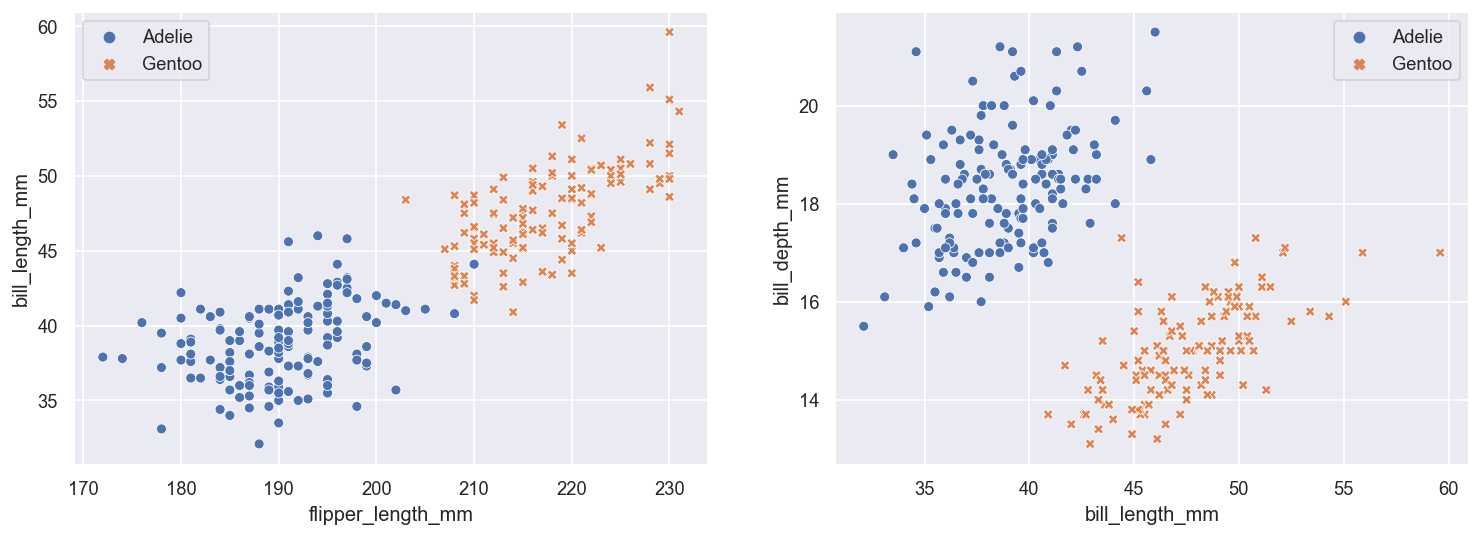

In [9]:
bill_flipper_plots()

# Decision Trees

Tree-based classifiers are inherently multiclass

A decision tree breaks data down by asking a series of questions in order to categorise samples into the same class. An algorithm starts at a tree root and then splits the data based on the features that gives the largest information gain. This splitting procedure occours until all the samples within a given node all belong to the same class. A limit on nodes, or tree depth, is often set to avoid overfitting due to a deep tree. To split using information gain relies on calculating the difference between an impurity measure of a parent node and the sum of the impurities of its child nodes; information gain being high when impurity of the child nodes is low. Three impurity measures that are commonly used in binary decision trees are gini impurity, entropy, and the classification error. An ensemble of decision trees can be created to build a more robust model by giving each tree a random bootstrap sample of the data and using a majority voting rule to predict class label<sup>1</sup>. 

Lets start by building a tree with one split.

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.

**Note**
The arrows dont show up on older versions of Scikit Learn due to a weird interaction with sns so I need to use `plt.style.context("classic")`. This has been fixed in later versions past what is currently availble on anaconda

In [10]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn import tree

DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = 1,
                            random_state=42)

def regions_tree(X, DT, feature_names, class_names):

    DT.fit(X,y)

    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    plt.sca(axes[0])

    ax = plot_decision_regions(X,
                          y,
                          clf = DT)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
              class_names, 
              framealpha=0.3, scatterpoints=1)

    plt.xlabel(feature_names[0]) 
    plt.ylabel(feature_names[1])
    with plt.style.context("classic"):
        plt.sca(axes[1])
        tree.plot_tree(DT,
                       feature_names=feature_names, 
                       class_names=class_names,
                       filled = True)
    plt.show()

Lets have a look at our dataset with two feature and one split.

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to produce binary trees, meaning nodes always have two children. Other algorithms, such as ID3, can have more children. The algorithms spits the training set into two subsets using a single feature and a theshold searching for the pair that produces the 'purest' subset based on size, minimising a cost function. Once split, it uses the same logic recursively until the maximum depth is reached or a split cannot be found that reduces impurity<sup>1</sup>. 

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

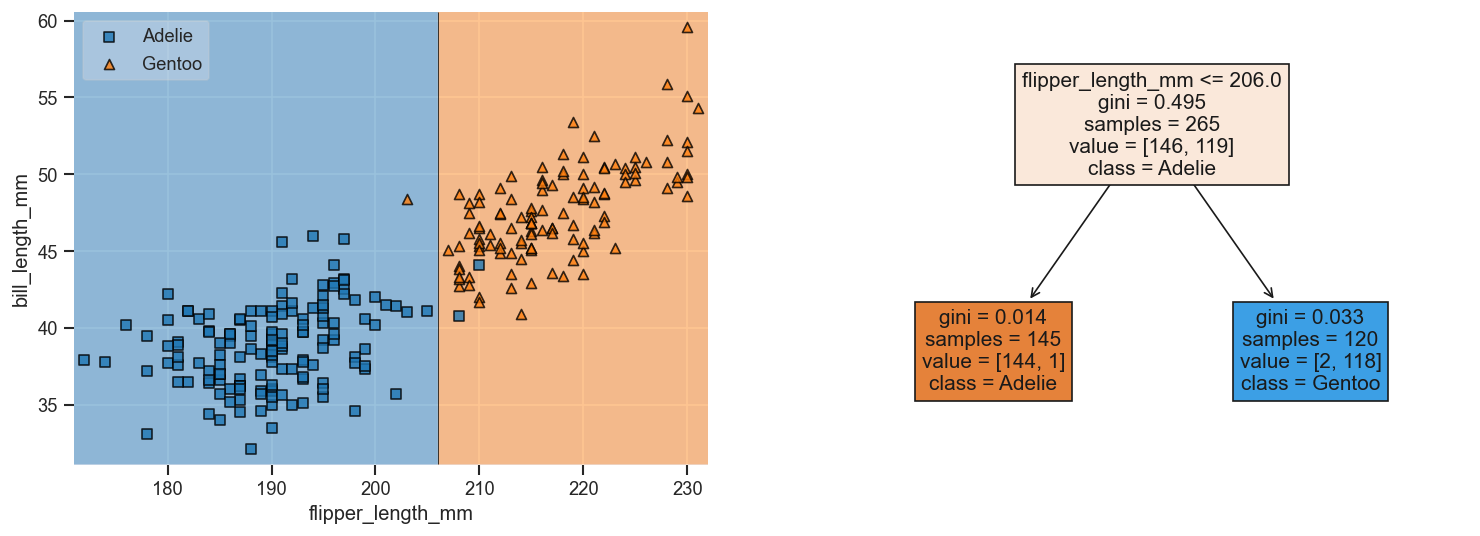

In [11]:
regions_tree(Xflbl, DT, flbl.columns[:-1], ['Adelie', 'Gentoo'])

DT's are sensitivie to the orientation of the data

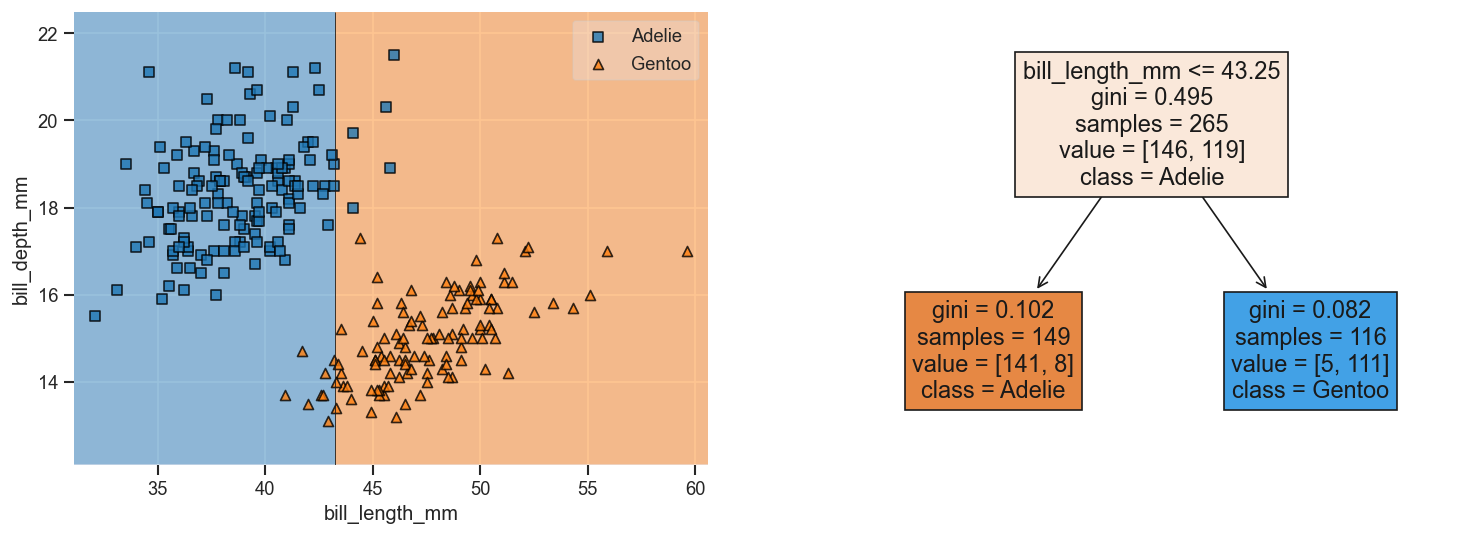

In [12]:
regions_tree(Xblbd, DT, blbd.columns[:-1], ['Adelie', 'Gentoo'])

As we can see above it has chosen a value at which to split the data up. If below or equal to 0.2 it is classed as seizure and above is baseline.

If we then look at the descision boundary we see this is just a straight line representing this split

Lets now not restrict the number of splits it uses.

In [13]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=42)

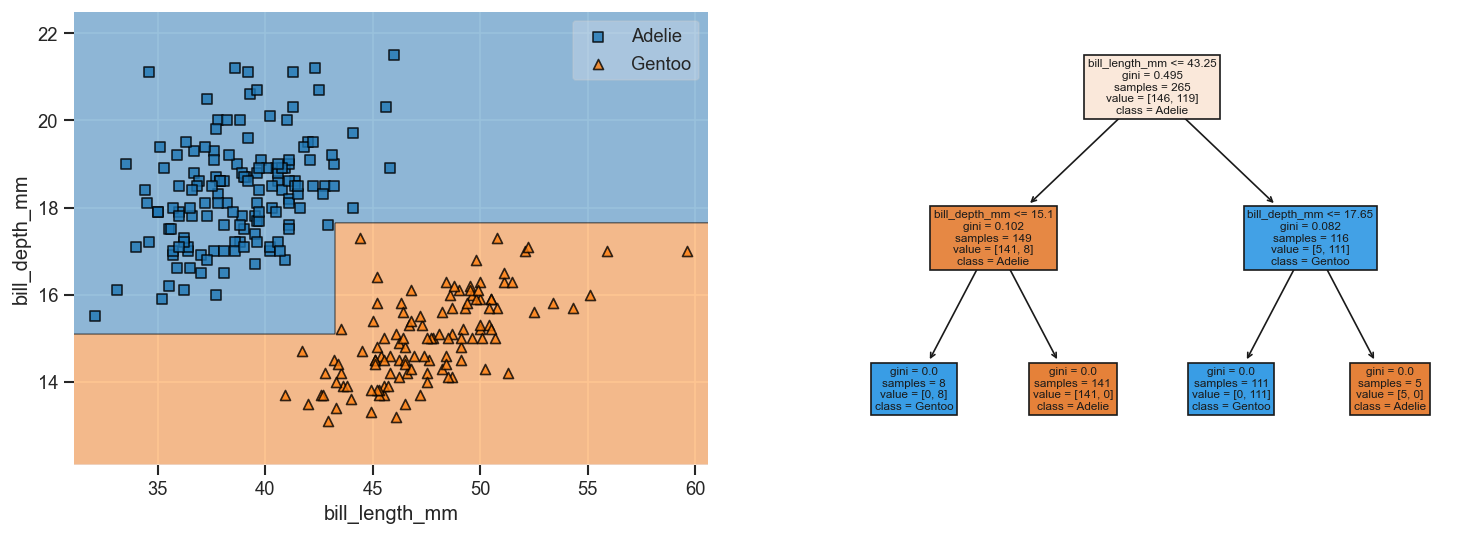

In [14]:
regions_tree(Xblbd, DT, blbd.columns[:-1], ['Adelie', 'Gentoo'])

As can be seen by the descision boundary, a decision tree is quite boxy. Furthermore, how the model makes a decision boundary is going to be affected by the rotation of the data (as DTs create straight lines).

Lets now fit it on the full data (without categories...more on  that later) and see what features it uses to split the data. Decision trees are useful as they allow us assess the importance of each feature to classify the data (more on that later). 

_"scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now."_ https://scikit-learn.org/stable/modules/tree.html

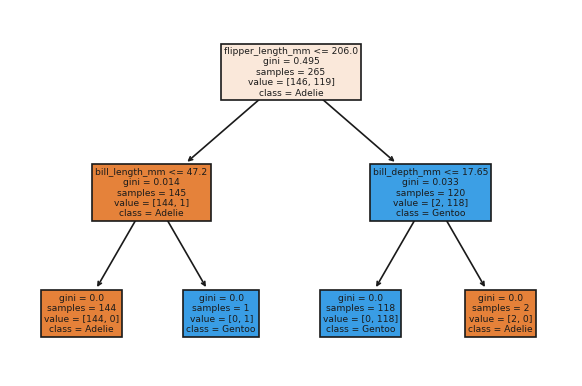

In [15]:
# drop our categorical features
penguins_cont = penguins_bin.drop(["species", "island", "sex"], axis=1)
X = penguins_cont.values

DT.fit(X, y)

fig, axes = plt.subplots()
with plt.style.context("classic"):
    tree.plot_tree(DT,
                   feature_names=penguins_cont.columns, 
                   class_names=['Adelie', 'Gentoo'],
                   filled = True)
    plt.show()

## Exercises
[THEORY BASED!]

1.

2.

## Implimentation

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

__[TEXT]__

In [17]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',
                            random_state=42)

DT.fit(X_train, y_train)
display(pd.DataFrame(classification_report(y_val, DT.predict(X_val), output_dict=True)))

0          1  accuracy  macro avg  weighted avg
precision   0.970588   1.000000  0.981132   0.985294      0.981687
recall      1.000000   0.950000  0.981132   0.975000      0.981132
f1-score    0.985075   0.974359  0.981132   0.979717      0.981031
support    33.000000  20.000000  0.981132  53.000000     53.000000

__[TEXT]__

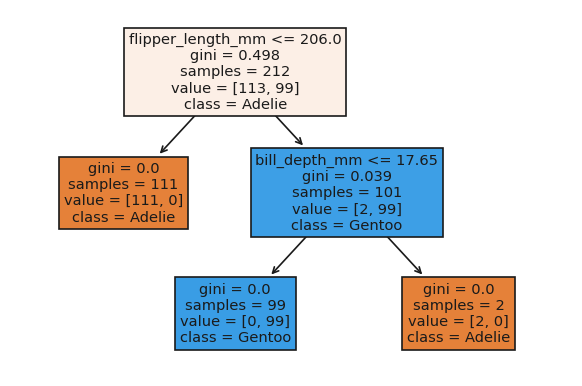

In [18]:
fig, axes = plt.subplots()
with plt.style.context("classic"):
    tree.plot_tree(DT,
                   feature_names=penguins_cont.columns, 
                   class_names=['Adelie', 'Gentoo'],
                   filled = True)
    plt.show()

### Extra Tree

An extratree is similar to a tree classifier except it more randomized and thusly produces more complex trees. An extratree tests a random number of splits rather than all splits. As we can see how just one tree looks, this is a very complex model!

In [19]:
from sklearn.tree import ExtraTreeClassifier

ET = ExtraTreeClassifier(criterion='gini',
                         random_state=42,
                         max_depth = None)

ET.fit(X, y)

display(pd.DataFrame(classification_report(y_val, DT.predict(X_val), output_dict=True)))

0          1  accuracy  macro avg  weighted avg
precision   0.970588   1.000000  0.981132   0.985294      0.981687
recall      1.000000   0.950000  0.981132   0.975000      0.981132
f1-score    0.985075   0.974359  0.981132   0.979717      0.981031
support    33.000000  20.000000  0.981132  53.000000     53.000000

__[TEXT]__

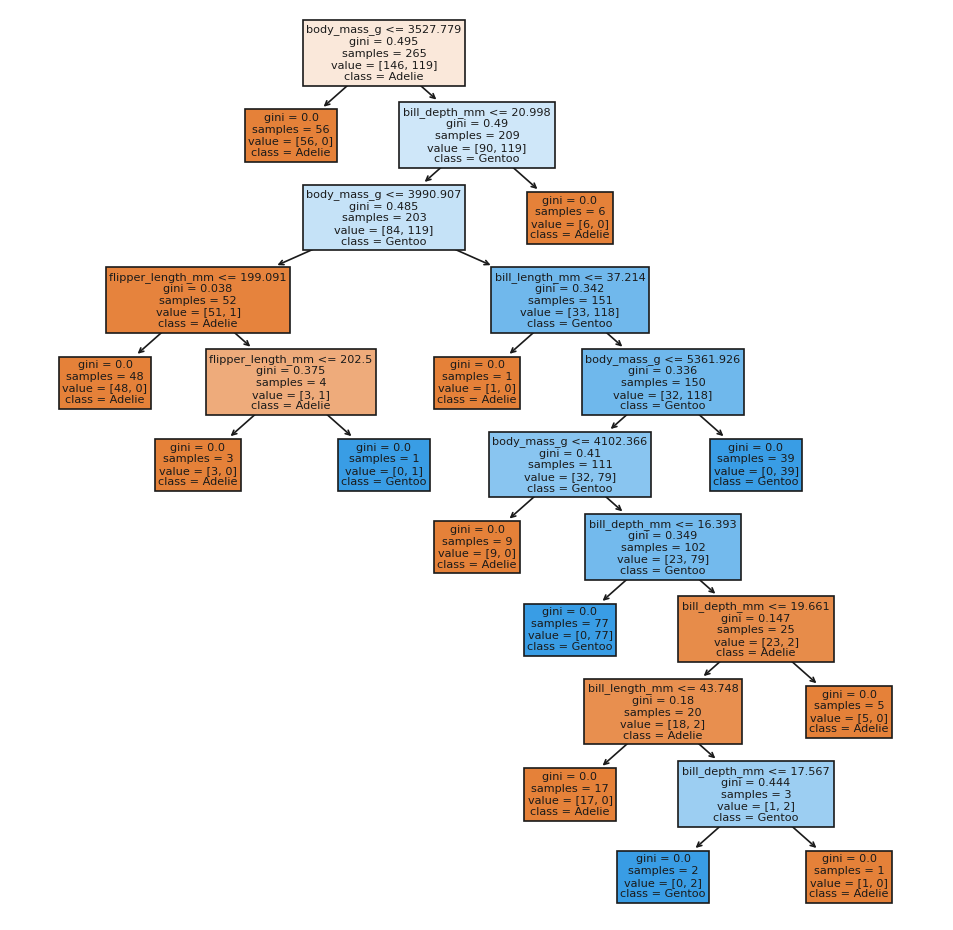

In [20]:
fig, axes = plt.subplots(figsize=(10, 10))
with plt.style.context("classic"):
    tree.plot_tree(ET,
                   feature_names=penguins_cont.columns, 
                   class_names=['Adelie', 'Gentoo'],
                   filled = True)
    plt.show()

# Averaging Methods
Averaging methods build several separate estimators and then, as their name suggets, average their predictions. By reducing the variance these tend to perform better than any single base estimator<sup>1</sup>.

## Bagging
A bagging classifier is an ensemble of base classifiers, each fit on random subsets of a dataset. Their predictions are then pooled or aggregated to form a final prediction. This reduces variance of an estimator and can be a simple way to reduce overfitting. They work best with complex models as opposed to boosting, which work best with weak models<sup>1</sup>.

Specifically, bagging is when sampling is produced with replacement<sup>2</sup>, and without replacement being called pasting<sup>3</sup>. Therefore both bagging and pasting allow training to be sampled several times across multipule predictors, with bagging only allowing several samples for the same predictor <sup>4</sup>.

---

1. https://scikit-learn.org/stable/modules/ensemble.html
2. Breiman, L. (1996). Bagging predictors. Machine learning, 24(2), 123-140.
3. Breiman, L. (1999). Pasting small votes for classification in large databases and on-line. Machine learning, 36(1-2), 85-103.
4. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

---

1. https://scikit-learn.org/stable/modules/ensemble.html

## Random Forests

Random forests are essentally bagged tree classifier. However, rather than using the bagging method above we can use one of the inbuilt methods Sklearn has specifically designed for fitting an ensemble of trees. A random forest is just a fancier version of bagging where multiple decision trees are averaged together to build a robust model that is less susceptible to overfitting.

The random forest algorithm can be summarized in four steps<sup>1</sup>:

> 1. *Draw a random bootstrap sample of size n (randomly choose n samples from the training set with replacement).*
> 2. *Grow a decision tree from the bootstrap sample. At each node:*
>
>    *a. Randomly select d features without replacement.*
>    
>    *b. Split the node using the feature that provides the best split according to the objective function, for instance, maximizing the information gain.*
>
>3. *Repeat the steps 1-2 k times.*
>4. *Aggregate the prediction by each tree to assign the class label by majority vote.*

Instead of using majority vote, as was done in the origional publication<sup>2</sup>, in Sklearn the RandomForestClassifier averages the probabilistic prediction.

**NOTES**
- We cannot use the graphviz on the whole forest as we did for the trees in the supervised learning notebook, as each tree is built differently.

---
1. Raschka2017
2. L. Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001

__[BIT MORE MATHY]__

Lets look at how a descion boundary created by a bagged tree could generalise better than a single tree

__TODO__
- do this on training and val data to show how the val data could cross the boundary?

In [21]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def tvf_regions():

    tree = DecisionTreeClassifier(criterion='gini',
                                  random_state=42)

    forest = RandomForestClassifier(criterion='gini',
                                    n_estimators=100,
                                    max_features = 'sqrt',
                                    random_state=42,
                                    n_jobs=-1)

    tree_dict = {'Tree':tree, 'Forest':forest}

    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    for i, classifier_name in enumerate(tree_dict):
        plt.sca(axes[i])

        tree_dict[classifier_name].fit(Xblbd, y)

        plot_decision_regions(Xblbd, y,
                              clf = tree_dict[classifier_name])

        #plt.xlabel(x_axis_label) 
        #plt.ylabel(y_axis_label)

        plt.title(classifier_name)
    plt.show()

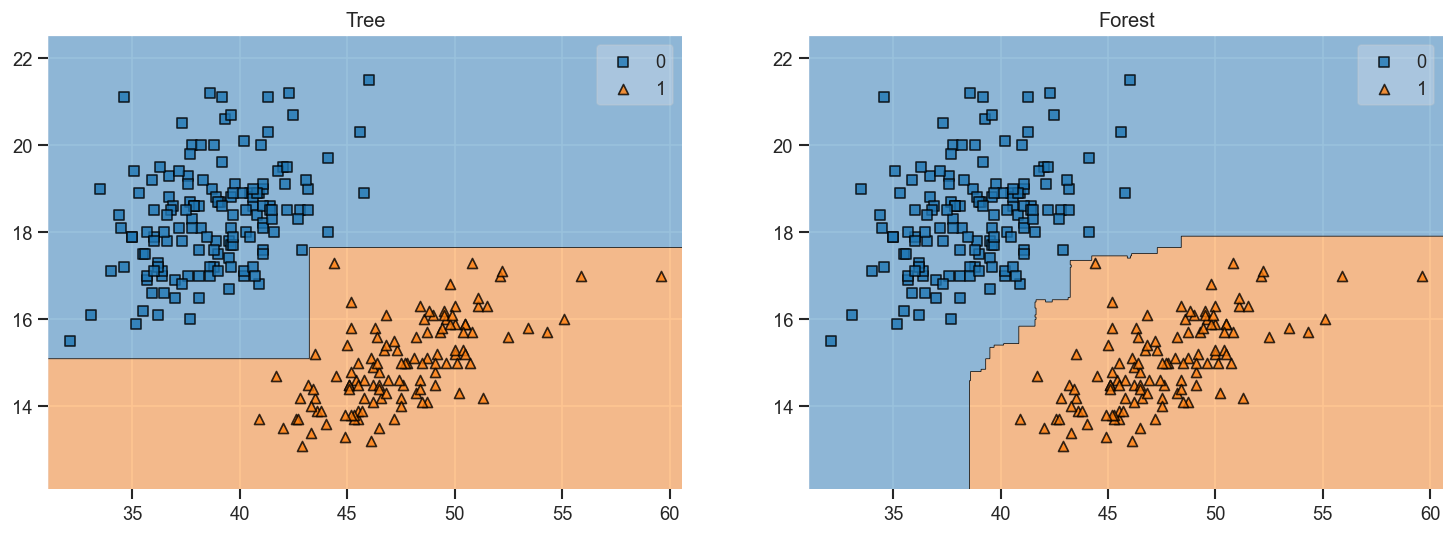

In [22]:
tvf_regions()

## Exercises
[THEORY BASED!]

1.

2.

## Implimentation

### Bagging/pasting
We can do this with any classifier, but today we're looking at trees so lets use them. 

**NOTE**
- If we wanted to use pasting we would just set *bootstrap=False*.

In [23]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=DT, 
                        n_estimators=100, 
                        max_samples=0.5, 
                        max_features=0.5, 
                        bootstrap=True, 
                        bootstrap_features=True, 
                        oob_score=True, 
                        warm_start=False,
                        n_jobs=-1, 
                        random_state=42)
bag.fit(X_train, y_train)

display(pd.DataFrame(classification_report(y_val, bag.predict(X_val) , output_dict = True)))

0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    33.0  20.0       1.0       53.0          53.0

An additional way we can get a performance metric on a validation set is to ensure we use `oob_score = True`

With bagging by default only trains on a sample of the training data, leaving a set of training data sampled as out-of-bag (oob) instances. Since they are not seen during training, we can evalute on them without a separate validation using the oob_score.

This estimated that its likely to get an accuracy of about 0.99 on the test/validation set so its a pretty close to what we did get above.

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=100,
                                max_features = 'sqrt',
                                class_weight = 'balanced',
                                random_state=42,
                                n_jobs=-1)
forest.fit(X_train, y_train)

display(pd.DataFrame(classification_report(y_val, forest.predict(X_val) , output_dict = True)))

0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    33.0  20.0       1.0       53.0          53.0

In [42]:
print(color.BOLD+color.UNDERLINE+"Bagged Trees"+color.END)
%timeit bag.fit(X, y)
print(color.BOLD+color.UNDERLINE+"Random Forest"+color.END)
%timeit forest.fit(X, y)

Bagged Trees
75.1 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Random Forest
116 ms ± 907 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


As well as Random forests, Extremely randomized trees<sup>1</sup> can also be used. These work similarly to Random forests except...

"*...instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias*"<sup>2</sup>.

In this case it appears we are better served by the random forest.

---
1. Geurts, P., Ernst, D., & Wehenkel, L. (2006). Extremely randomized trees. Machine learning, 63(1), 3-42.
2. https://scikit-learn.org/stable/modules/ensemble.html

### Dimension Reduction
#### Model Stacking
A method growing in popularity is to use model stacking, where the input to one model is the output of another. This allows for nonlinearities to be captured in the first model, and the potential to use a simple linear model as the last layer. Deep learning is an example of model stacking as, often neural networks are layered on top of one another, to optimize both the features and the classifier simultaneously<sup>1</sup>.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

#### Feature Importances

An example of model stacking is to use the output of a decision tree–type model as input to a linear classifier. We can gain the importance for each feature by getting the average impurity decrease computed from all decision trees in the forest without regarding the linear separability of the classes. However, if features are highly correlated, one feature may be ranked highly while the information of the others not being fully captured<sup>1</sup>. 

---

1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.

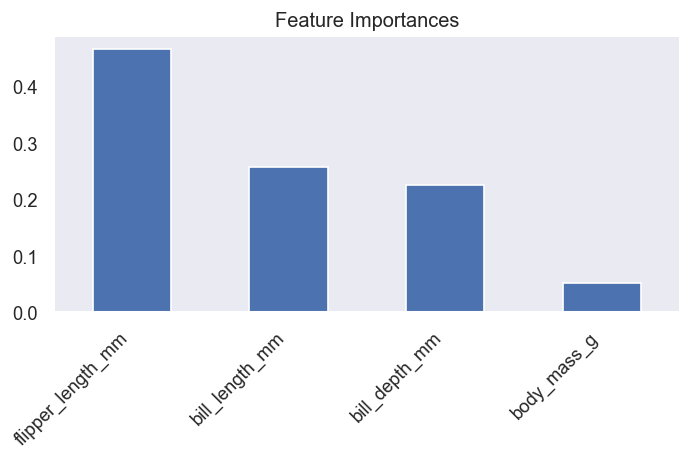

In [32]:
from sklearn.ensemble import RandomForestClassifier

# get the importances for the features
importances = forest.feature_importances_

importances_series = pd.Series(importances,index=penguins_cont.columns).sort_values(ascending = False)

# plot the important features
importances_series.plot.bar(legend =False, grid=False)
plt.title('Feature Importances')

plt.xticks(rotation=45,ha='right')
plt.tight_layout()

#plt.savefig('forest_importances.png', dpi=300)
plt.show()

Rather than manually setting a theshold like we have done (looking at the top 30) we can put it in a pipeline and use the SelectFromModel function from Scikit-learn. Using this we can still provide both a numeric theshold or we could use a heuristic such as the mean and median<sup>1</sup>.

---

1. http://scikit-learn.org/stable/modules/feature_selection.html

In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='rbf', random_state=42, class_weight = 'balanced')
rf = RandomForestClassifier(criterion='gini',
                            n_estimators=100,
                            max_features = 'sqrt',
                            random_state=42,
                            class_weight = 'balanced',
                            n_jobs=-1)

rf_svm = Pipeline([
  ('feature_selection', SelectFromModel(rf, threshold = 'mean')),
  ('classification', svm)
])

svm_dict = {'SVM':svm, 'Forest SVM':rf_svm}

for classifier_name in svm_dict:
    scores = cross_val_score(estimator=svm_dict[classifier_name], 
                             X=X_train, 
                             y=y_train, 
                             scoring = 'accuracy',
                             cv=StratifiedKFold(),
                             n_jobs=-1)

    print(color.BOLD+color.UNDERLINE+classifier_name+color.END)
    #print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

SVM
CV accuracy: 0.906 +/- 0.039
Forest SVM
CV accuracy: 0.986 +/- 0.012


#### Imballanced Data
It is also worth noting we have been dealing with the class imballance found in this data by using `class_weight = 'balanced'` to assign more importance to getting ictal data predictions correct. We can however also undersample using a ballanced random forest. Generally what performs better depends on the amount of data you are training on. If small then class wight will be better (as seen below), but if you have very large datasets, then undersampling will likely work better.

__NOTE__
- note sure this imballance is going to do much, use abalone_data?

In [52]:
from collections import Counter

print(Counter(y_train))

Counter({0: 113, 1: 99})


In [53]:
from imblearn.ensemble import BalancedRandomForestClassifier

bal_f = BalancedRandomForestClassifier(criterion='gini',
                                       n_estimators=1000,
                                       max_features = 'sqrt',
                                       random_state=42,
                                       n_jobs=-1)

rf_dict = {'Random Forest':rf, 'Balanced Random Forest':bal_f}

for classifier_name in rf_dict:
    scores = cross_val_score(estimator=rf_dict[classifier_name], 
                             X=X_train, 
                             y=y_train, 
                             scoring = 'accuracy',
                             cv=StratifiedKFold(),
                             n_jobs=-1)

    print(color.BOLD+color.UNDERLINE+classifier_name+color.END)
    #print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Random Forest
CV accuracy: 0.995 +/- 0.010
Balanced Random Forest
CV accuracy: 0.995 +/- 0.010


# Boosting (if Time)

## Exercises
[THEORY BASED!]

1.

2.